## Load Dataset

In [2]:
import networkx as nx
import os
def load_network(edge_list_file):
    """
    Load a network from an edge list file.
    
    Args:
        edge_list_file (str): Path to the edge list file
        
    Returns:
        networkx.Graph: The loaded network graph
    """
    try:
        # Check if file exists and has content
        if not os.path.exists(edge_list_file) or os.path.getsize(edge_list_file) == 0:
            raise FileNotFoundError(f"Edge list file not found or empty: {edge_list_file}")
        
        # Load the network
        G = nx.read_edgelist(edge_list_file)
        print(f"Network loaded from {edge_list_file}")
        print(f"  Number of nodes: {G.number_of_nodes()}")
        print(f"  Number of edges: {G.number_of_edges()}")
        print(f"\tNetwork density: {nx.density(G):.4f}")      
        
        return G
    
    except Exception as e:
        print(f"Error in load_network: {str(e)}")
        raise

# Load the network
edge_list_file_vec = "network_similarity_vec.csv"
G = load_network(edge_list_file_vec)

Network loaded from ./network_similarity_vec.txt
  Number of nodes: 181604
  Number of edges: 5777365


## Degree Distribution Analysis

In [20]:
import numpy as np
# Small world and heavy-tail analysis

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
print("Basic degree statistics:")
print(f"\tTotal degree: {sum(degree_sequence)}")
print(f"\tMinimum degree: {np.min(degree_sequence)}")
print(f"\tMaximum degree: {np.max(degree_sequence)}")
print(f"\tMean degree: {np.mean(degree_sequence):.2f}")
print(f"\tMedian degree: {np.median(degree_sequence)}")

Basic degree statistics:
	Total degree: 11554730
	Minimum degree: 1
	Maximum degree: 91705
	Mean degree: 63.63
	Median degree: 30.0


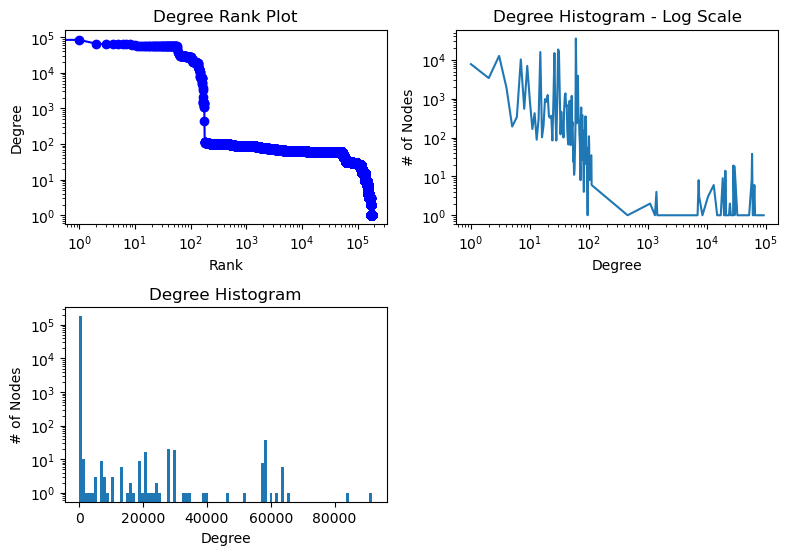

In [18]:
import matplotlib.pyplot as plt

def plot_degree_sequence(degrees):
    fig = plt.figure("Degree Distribution Analysis", figsize=(8, 8))
    axgrid = fig.add_gridspec(3, 2)
    
    # Subplot 1: Degree rank plot
    ax1 = fig.add_subplot(axgrid[0, 0])
    ax1.loglog(degrees, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")
    
    # Subplot 2: Degree histogram
    ax2 = fig.add_subplot(axgrid[1, 0])
    ax2.hist(degrees, bins=100, log=True)
    ax2.set_title("Degree Histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    
    # Subplot 3: Degree Log Scale
    ax3 = fig.add_subplot(axgrid[0, 1])
    ax3.loglog(*np.unique(degrees, return_counts=True))
    ax3.set_title("Degree Histogram - Log-Log")
    ax3.set_xlabel("Degree")
    ax3.set_ylabel("# of Nodes")
    
    fig.tight_layout()
    plt.show()
plot_degree_sequence(degree_sequence)

## Connected Component Analysis

In [3]:
def giant_network_analysis(G):
    """
    Perform basic analysis on a network graph.
    
    Args:
        G (networkx.Graph): The network graph to analyze
        
    Returns:
        networkx.Graph: The analyzed network graph
    """
    try:
        print(f"\nNetwork Analysis:")

        # Connected components analysis
        num_components = nx.number_connected_components(G)
        print(f"  Number of connected components: {num_components}")
        
        largest_cc = None
        if num_components > 0:
            # Get largest connected component
            largest_cc = max(nx.connected_components(G), key=len)
            largest_cc_size = len(largest_cc)
            print(f"  Size of largest connected component: {largest_cc_size} nodes")
            print(f"  Percentage of nodes in largest component: {largest_cc_size/G.number_of_nodes()*100:.2f}%")
        
        return largest_cc
    
    except Exception as e:
        print(f"Error in analyze_network: {str(e)}")
        raise

# Analyze the network
Giant = giant_network_analysis(G)


Network Analysis:
  Number of connected components: 1
  Size of largest connected component: 181604 nodes
  Percentage of nodes in largest component: 100.00%


In [12]:
import random

g_cc = G.subgraph(Giant).copy()
print("Giant graph made")

# Finding the APSP is very computation heavy and is infeasible for a graph this large so take an approximation

# Network diameter
# Do multiple runs to get a better approximation
def approximate_diameter(graph, runs=20):
    diameters = []
    for i in range(runs):
        if i%5==0:
            print(f"Running iteration {i}")
        diameters.append(nx.algorithms.approximation.diameter(graph))
    return max(diameters)

# Network average shortest path
# Do multiple runs to get a better approximation
# https://stackoverflow.com/questions/67496060/networkx-average-shortest-path-length-and-diameter-is-taking-forever
def approximate_average_shortest_path(giant_component, runs=1000):
    total = 0
    nodes = list(giant_component.nodes())
    for i in range(runs):
        if i%100==0:
            print(f"Running iteration {i}")
        u, v = random.sample(nodes, 2) # get two random nodes
        length = nx.shortest_path_length(giant_component, u, v)
        total += length
    return total/runs


diameter = approximate_diameter(g_cc)
print(f"Approximate network diameter: {diameter:.4f}")

shortest_path_avg = approximate_average_shortest_path(g_cc)
print(f"Network shortest average path: {shortest_path_avg:.4f}")
        

Giant graph made
Running iteration 0
Running iteration 5
Running iteration 10
Running iteration 15
Approximate network diameter: 6.0000
Running iteration 0
Running iteration 100
Running iteration 200
Running iteration 300
Running iteration 400
Running iteration 500
Running iteration 600
Running iteration 700
Running iteration 800
Running iteration 900
Network shortest average path: 2.7250


In [ ]:
# Refer to Gephi file for the most accurate numbers.

## Centrality Analysis

In [ ]:
# 1. Computing Degree Centrality (Normalized)
degree_centrality = nx.degree_centrality(G)

# 2. Computing Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)

# 3. Computing Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Extracting top 5 nodes for each centrality measure
top_5_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_5_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("Top 5 Nodes by Degree Centrality:", top_5_degree)
print("Top 5 Nodes by Betweenness Centrality:", top_5_betweenness)
print("Top 5 Nodes by Closeness Centrality:", top_5_closeness)


# This take forever to run, again, APSP. Degree centrality is fast, though
# TODO: Graphs

## Clustering analysis

In [29]:
# Clustering coefficient for each node
clustering_coeffs = nx.clustering(G)

# average clustering coefficient
avg_clustering = nx.average_clustering(G)

# Compute global clustering coefficient
global_clustering = nx.transitivity(G)

# Print results
print(f"Minimum Clustering Coefficient: {min(clustering_coeffs)}")
print(f"Maximum Clustering Coefficient: {max(clustering_coeffs)}")
print(f"Average Clustering Coefficient: {avg_clustering:.6f}")
print(f"Global Clustering Coefficient: {global_clustering:.6f}")

# Also takes forever to run

KeyboardInterrupt: 

In [30]:
# Generating Watts-Strogatz small-world network
WS_graph = nx.watts_strogatz_graph(G.number_of_nodes(), round(np.mean(degree_sequence)), 0.1)

# Computing metrics for Watts-Strogatz model
ws_avg_clustering = nx.average_clustering(WS_graph)
ws_global_clustering = nx.transitivity(WS_graph)
ws_avg_shortest_path = nx.average_shortest_path_length(WS_graph)

# Print comparison
print("Comparison of Facebook Network vs. Watts-Strogatz Model:")
print(f"Average Clustering Coefficient = Facebook: {0.6055}, Watts-Strogatz: {ws_avg_clustering:.4f}")
print(f"Global Clustering Coefficient = Facebook: {0.5192}, Watts-Strogatz: {ws_global_clustering:.4f}")
print(f"Average Shortest Path Length = Facebook: {3.6925}, Watts-Strogatz: {ws_avg_shortest_path:.4f}")

KeyboardInterrupt: 